# Publication Quality Plots and Errorbars

# Increase Plot Quality

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# %matplotlib notebook -- useful for interactive plotting!
# %matplotlib inline -- returns us back to normal



In [5]:
# simulate some data
x = np.linspace(0,2*np.pi,100)
y = np.sin(x)

# assign measurements errors to our data
yerr = np.random.uniform(0.1,0.2,len(x))
xerr = 0.1*np.ones_like(yerr)

# RESAMPLE our data assuming Gaussian distribution w/ mu=0,sd=yerr
y = np.random.normal(y,yerr)

## Default Matplotlib Plot

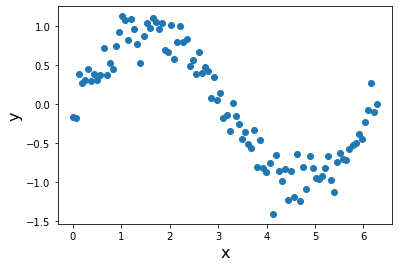

In [6]:
plt.figure()
plt.scatter(x,y,)
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.savefig('test_figure.png')
plt.show()

There are some problems with this:


## 1. The figure is low resolution, by default. If you naively save this figure, it will show up very grainy and, frankly, **ugly**, in your reports. Increase resolution with ``dpi=''.

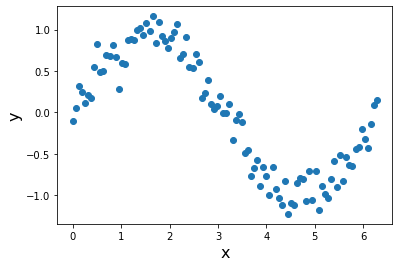

In [14]:
plt.figure()
plt.scatter(x,y,)
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.savefig('test_figure_hires.png',dpi=300)
plt.show()

If we compare how these both look:

Low-Resolution:
![image](test_figure.png)

Increased DPI:
![image](test_figure_hires.png)

## 2. The default is to save as a .png, which is by default rasterized. It is often preferred to save figures as vector graphics, which are defined in the Cartesian plane and not in terms of pixels. **This allows for graphics to be scaled up and down without loss of resolution.**

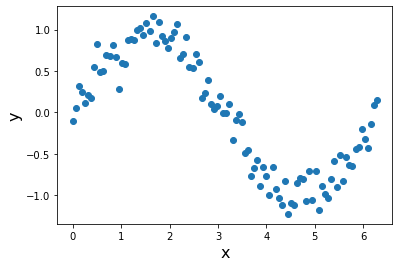

In [15]:
plt.figure()
plt.scatter(x,y,)
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.savefig('test_figure_hires.eps') # eps file format
plt.show()

# Error Bar Plotting

The art of making a good plot gets even more difficult when you have errors. Here are some tips and tutorials for how to do this in Matplotlib:

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


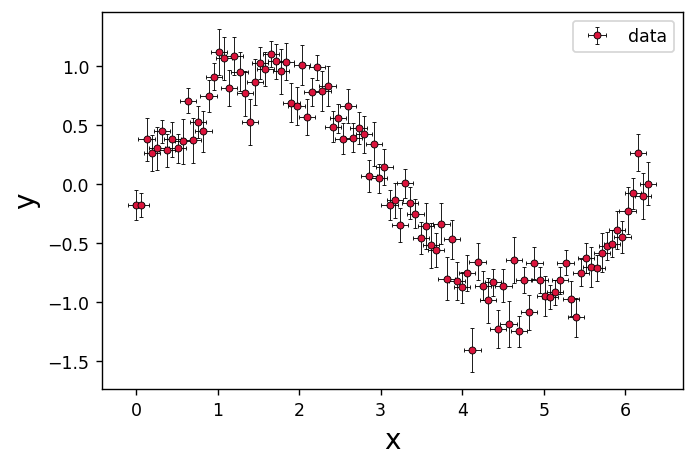

In [8]:
style = dict(
    
    # general properties
    linestyle='none', # do not connect points
    
    # points
    marker='o', # marker shape
    ms=4, # marker size
    lw=1, # line width
    markerfacecolor='crimson', #color of marker faces
    markeredgecolor='k', # color of marker edges
    markeredgewidth=0.5, # width of the edge lines
    
    # errors
    ecolor='k', # color of errorbars
    elinewidth=0.5, #errorbar line width
    capsize=1, # by default, caps are off: this specifies size
    # label
    label='data' # label for legend
)

plt.figure(dpi=125)
plt.errorbar(x=x,y=y,
             xerr=xerr,yerr=yerr, 
             **style)
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.legend(loc='upper right')
plt.savefig('final_figure.eps')
plt.show()

The xerr, yerr errorbar sizes:

* scalar: Symmetric +/- values for all data points.
* shape(N,): Symmetric +/-values for each data point.
* shape(2, N): Separate - and + values for each bar. First row contains the lower errors, the second row contains the upper errors.
* None: No errorbar.